# Final demand per household in right units

In this note book we will combine the different expenditure data to create one file with the final demand per household per consumption catergory including the ones with precalculated unit conversions (i.e. electricity expenditure to kwh). Replicate Andi's hh_prepared_imputed file

In [1]:
import pandas as pd
import numpy as np
import os
import itertools
import matplotlib.pyplot as plt

In [2]:
# define paths
habe_2017_dir = '/Users/ajakobs/Documents/data/HABE/131_EBM 2015-2017/HABE151617_191111UOe/'

## First combine 'Ausgaben', 'Konsumgueter' and 'Mengen' files

Expenditure, durable goods and quantitities


In [3]:
ausgaben = pd.read_csv(os.path.join(habe_2017_dir, 'HABE151617_Ausgaben_191111UOe.txt'), sep='\t', header=0, index_col=0)
konsum = pd.read_csv(os.path.join(habe_2017_dir, 'HABE151617_Konsumgueter_191111UOe.txt'), sep='\t', header=0, index_col=0)
mengen = pd.read_csv(os.path.join(habe_2017_dir, 'HABE151617_Mengen_191111UOe.txt'), sep='\t', header=0, index_col=0)

In [4]:
# Read in the LCA model to get the variable names of the consumption goods
lca_model = pd.read_excel('/Users/ajakobs/Documents/CCL/consumption_model_ch/consumption_model_ch/data/Consumption_model_update_151617.xlsx', sheet_name='Overview & LCA-Modeling', skiprows=2)
konsum_variable_names = lca_model.iloc[69:89]['Variable code'].values
konsum_variable_names

array(['cg_nonewcars', 'cg_nousedcars', 'cg_nomotorbikes',
       'cg_nobicycles', 'cg_nofreezers', 'cg_nodishwashers',
       'cg_nowashmachines', 'cg_nodriers', 'cg_nocrttvs', 'cg_nolcdtvs',
       'cg_nosat', 'cg_nocams', 'cg_novideorecs', 'cg_novieogames',
       'cg_nodesktoppcs', 'cg_nolaptops', 'cg_noprinters',
       'cg_nomobilephones', 'cg_nomp3players', 'cg_nogps'], dtype=object)

In [5]:
# change durable goods names to match the codes of the LCA model
konsum.columns = konsum_variable_names

In [6]:
# Append the three dataframes
Total_demand  = pd.concat([ausgaben,konsum,mengen], axis=1)
column_names  = [col.lower() for col in Total_demand.columns]
Total_demand.columns = column_names
Total_demand.sort_index()
Total_demand.index.name = 'haushaltid'
Total_demand

,a30,a31,a310,a3100,a310001,a310002,a310003,a310004,a310005,a32,...,m521205,m521206,m521207,m521208,m521209,m5213,m521300,m621501,m621502,m6215a
haushaltid,,,,,,,,,,,,,,,,,,,,,
360101,2464.199885,1056.637385,1056.637385,1056.637385,549.059898,60.157967,47.379520,397.00,3.04,737.562500,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,34.066667,0.000000,34.066667
360102,1313.051985,731.293652,731.293652,731.293652,268.147063,57.016250,11.480339,390.50,4.15,378.858333,...,3.041667,0.0,0.000000,0.0,0.0,1.338333,1.338333,46.115591,0.000000,46.115591
360111,1132.345833,49.350000,49.350000,49.350000,31.175000,0.000000,15.925000,0.00,2.25,405.195833,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
360122,1285.412446,739.604956,739.604956,739.604956,301.831756,64.122625,83.900574,287.55,2.20,2.083333,...,0.000000,0.0,1.580453,0.0,0.0,0.000000,0.000000,42.298790,0.000000,42.298790
360125,3149.459725,1130.272225,1130.272225,1130.272225,400.444527,85.069708,82.457990,555.60,6.70,1110.820833,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,99.962903,0.000000,99.962903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431723,1813.362026,825.328172,825.328172,825.328172,383.775208,82.170833,126.332130,233.05,0.00,274.933854,...,1.425781,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,156.832258,156.832258
431730,2144.822082,1149.255416,1149.255416,1149.255416,459.329375,98.037500,100.938541,490.95,0.00,263.166667,...,1.425781,0.0,0.981183,0.0,0.0,10.455729,10.455729,41.209677,44.153226,85.362903
431738,636.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,...,2.133627,0.0,0.000000,0.0,0.0,1.901042,1.901042,0.000000,0.000000,0.000000


## Now we will add the following mx categories

- mx571202: Kehrichtabfuhrgebühren des Hauptwohnsitzes
- mx571203: Abwassergebühren des Hauptwohnsitzes
- mx571204: Wasserzins des Hauptwohnsitzes

- mx571301: Elektrizität des Hauptwohnsitzes
- mx571302: Gas und andere Brennstoffe des Hauptwohnsitzes
- mx571303: Zentralheizung oder Fernwärme des Hauptwohnsitzes

mx571303 is not expliocitly modelled but included in mx571302

For the first three categories (Water supply, waste water treatment and waste collection) we will use the data from Andi for now (See table S6,S7 and S8). He got the data from: https://www.preisvergleiche.preisueberwacher.admin.ch/

In [576]:
# We need demographics data so first read in data on the households:
file_str = 'Standard'
hh_data = pd.read_csv(os.path.join(habe_2017_dir, f'HABE151617_{file_str}_191111UOe.txt'), sep='\t', header=0, index_col=0)
hh_data.sort_index()
hh_data

,Strate01,SRH03_151617,Gewicht10_151617,E10,E11,E12,E15,E20,E21,E22,...,Grossregion01,Sprachregion98,Kanton08,AltersklasseRefP08,Einkommensklasse08_151617,Haushaltstyp14,HaushaltstypAnzahlKinder14,HaushaltstypAlter14,HaushaltstypGrob14,HaushaltstypEinkommen14_151617
HaushaltID,,,,,,,,,,,,,,,,,,,,,
360101,1,676802.50000,511.219688,8274.925833,5509.146667,2765.779167,0.291667,0.000000,0.0,0.000000,...,1,2,22,1,3,210,900,202,200,212
360102,1,676802.50000,360.257688,5212.875000,5212.875000,0.000000,0.141667,0.000000,0.0,0.000000,...,1,2,22,1,2,110,900,101,100,112
360111,1,676802.50000,550.323306,0.000000,0.000000,0.000000,0.095833,605.475000,0.0,0.000000,...,1,2,99,1,1,210,900,201,200,211
360122,1,676802.50000,413.061166,5895.979167,5895.979167,0.000000,0.000000,1090.000000,0.0,0.000000,...,1,2,25,1,2,300,900,900,900,900
360125,1,676802.50000,550.652917,7913.543414,7913.543414,0.000000,21.920833,3265.766667,1880.0,1385.766667,...,1,2,22,4,4,900,900,900,900,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431723,7,159906.58333,872.239377,8105.142473,0.000000,8105.142473,8.333333,0.000000,0.0,0.000000,...,7,3,21,4,3,900,900,900,900,900
431730,7,159906.58333,172.619969,8972.750000,8972.750000,0.000000,55.833333,400.000000,0.0,0.000000,...,7,3,21,3,3,400,401,403,900,402
431738,7,159906.58333,100.951392,0.000000,0.000000,0.000000,0.153354,3395.500000,0.0,0.000000,...,7,3,21,1,2,300,900,900,900,900


In [577]:
#define masks needed for utility conversion
years = [2015,2016,2017]
# dictionary of canton numbers:
cantons_dict = {1:'Canton Zurich',
           2:'Canton Bern',
           3:'Canton Lucerne',
           17:'Canton St. Gallen',
           19:'Canton Aargau',
           21:'Canton Ticino',
           22:'Canton Vaud',
           25:'Canton Geneva',
           99:'Swiss Average',
          }
cantons_dict_r = {k:v for v,k in cantons_dict.items()}
household_size = {'HH1':1,
                  'HH2':2,
                  'HH3':3,
                  'HH4':4
                  }

electricity_categories = {'H1':(0,1600), 
                          'H2':(1600,2500),
                          'H34':(2500,4500),  # Difference between h3 and h4 is based in house type for which we do not have info. Therefore average the price
                          # 'H4':4500,
                          'H5':(4500,7500),
                          'H6':(13000,25000),
                          'H7':(7500,13000),
                         }
# electricity_categories = {'H1':1600, 
#                           'H2':2500,
#                           'H34':4500,  # Difference between h3 and h4 is based in house type for which we do not have info. Therefore average the price
#                           # 'H4':4500,
#                           'H5':7500,
#                           'H6':25000,
#                           'H7':13000,
#                          }
electricity_consumption = np.array([1600,2500,4500,7500,13000,25000])
electricity_cats = ['H1','H2','H34','H5','H7','H6']

electricity_categories_r = {v:k for k,v in electricity_categories.items()}

## First waste bags, waste water treatment, and water supply

In [578]:
# read in waste bag-, waste water treatment-, and water supply- prices from Andi
# HH1
waste_prices = pd.read_excel('/Users/ajakobs/Documents/Papers/SI material/Froemelt_et_al_2018_tables.xlsx', sheet_name='waste bag prices', index_col=0)
waste_prices.rename(index={'Swiss Average (other cantons)':'Swiss Average'}, inplace=True)
waste_water_prices = pd.read_excel('/Users/ajakobs/Documents/Papers/SI material/Froemelt_et_al_2018_tables.xlsx', sheet_name='waste water treatment prices', index_col=0)
waste_water_prices.rename(index={'Swiss Average (other cantons)':'Swiss Average'}, inplace=True)
water_prices = pd.read_excel('/Users/ajakobs/Documents/Papers/SI material/Froemelt_et_al_2018_tables.xlsx', sheet_name='water supply prices', index_col=0)
water_prices.rename(index={'Swiss Average (other cantons)':'Swiss Average'}, inplace=True)


In [579]:
# multiply the hh expenditure with the price based on household demographic
mx571202 = Total_demand['a571202'].copy()  # waste
mx571202.name = 'mx571202'
mx571203 = Total_demand['a571203'].copy()  # waste water treatment
mx571203.name = 'mx571203'
mx571204 = Total_demand['a571204'].copy()  # Water supply
mx571204.name = 'mx571204'
n_hh = 0  # sum all all masks to check if all households are covered
for hh, canton in itertools.product(household_size.keys(), cantons_r.keys()):
    if not hh=='HH4':
        mask = (hh_data['AnzahlPersonen98']==household_size[hh]) & (hh_data['Kanton08']==cantons_dict_r[canton])
        n_hh += mask.sum()
    else:
        mask = (hh_data['AnzahlPersonen98']>=household_size[hh]) & (hh_data['Kanton08']==cantons_dict_r[canton])
        n_hh += mask.sum()
    waste_price = waste_prices.loc[canton,hh]
    mx571202.loc[mask] /= waste_price
    waste_water_price = waste_water_prices.loc[canton,hh]
    mx571203.loc[mask]  /= waste_water_price
    water_price = water_prices.loc[canton, hh]
    mx571204.loc[mask] /= water_price

print(n_hh, 'households covered')


# now the geneva price for waste is zero, so give people there just an the average non zero waste for the rest of CH
geneva = cantons_dict_r['Canton Geneva']
geneva_households = hh_data[hh_data['Kanton08']==geneva].index
non_geneva_housholds = hh_data[hh_data['Kanton08']!=geneva].index
mx571202.loc[geneva_households] = mx571202.loc[non_geneva_housholds].loc[mx571202.loc[non_geneva_housholds]!=0].mean()

9955 households covered


## That seems like a lot of households without actual data on the waste-/water expenditure

Let's check that in more detail...:

### Waste

In [580]:
# number of households without waste expenditure
sum(Total_demand['a571202']==0)

4849

21.198330159425982

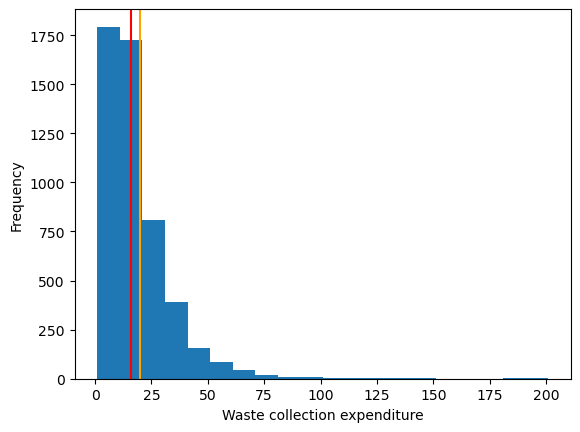

In [581]:
Total_demand.loc[Total_demand['a571202']!=0, 'a571202'].plot(kind='hist', bins=np.linspace(1,201,21))
plt.axvline(Total_demand.loc[Total_demand['a571202']!=0, 'a571202'].median(),c='r')
plt.axvline(Total_demand.loc[Total_demand['a571202']!=0, 'a571202'].mean(),c='orange')
plt.xlabel('Waste collection expenditure')
Total_demand.loc[Total_demand['a571202']!=0, 'a571202'].std()

### Waste water

In [582]:
# set waste for all households without expenditure data to the CH average
mx571202.loc[Total_demand['a571202']==0] = mx571202.loc[mx571202!=0].mean()
mx571202

360101     7.382844
360102     7.680492
360111     7.440476
360122     7.382844
360125     6.190428
            ...    
431723     7.382844
431730    10.160099
431738     7.382844
431744     7.382844
431748     7.382844
Name: mx571202, Length: 9955, dtype: float64

In [583]:
# number of households without waste water expenditure
sum(Total_demand['a571203']==0)

7942

13.924930800823702

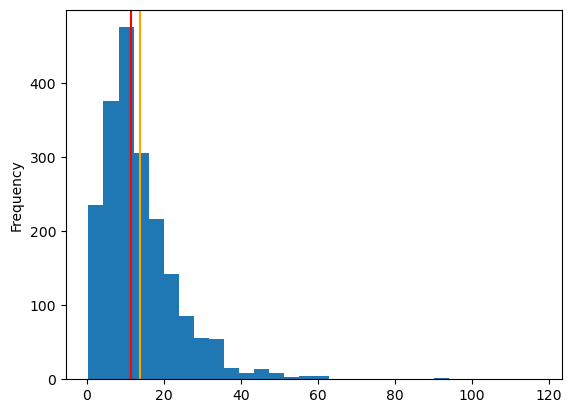

In [584]:
mx571203.loc[Total_demand['a571203']!=0].plot(kind='hist', bins=30)
plt.axvline(mx571203.loc[Total_demand['a571203']!=0].median(), c='r')
plt.axvline(mx571203.loc[Total_demand['a571203']!=0].mean(), c='orange')
mx571203.loc[Total_demand['a571203']!=0].mean()

In [585]:
# same here, set waste water collection to average for household without expenditure info
mx571203.loc[Total_demand['a571203']==0] = mx571203.loc[Total_demand['a571203']!=0].mean()
mx571203

360101    13.924931
360102    13.924931
360111    13.924931
360122    13.924931
360125    13.924931
            ...    
431723    13.924931
431730     4.198718
431738    13.924931
431744    13.924931
431748    13.924931
Name: mx571203, Length: 9955, dtype: float64

### Water use

In [586]:
# number of households without water use expenditure
sum(Total_demand['a571204']==0)

7680

13.206977545953508

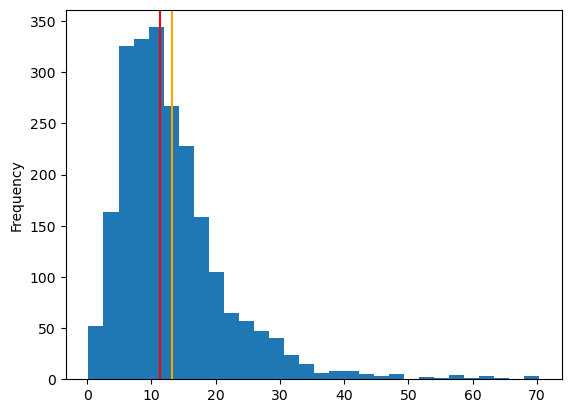

In [587]:
mx571204.loc[Total_demand['a571204']!=0].plot(kind='hist', bins=30)
plt.axvline(mx571204.loc[Total_demand['a571204']!=0].median(), c='r')
plt.axvline(mx571204.loc[Total_demand['a571204']!=0].mean(), c='orange')
mx571204.loc[Total_demand['a571204']!=0].mean()

In [588]:
# same here, set water use to average for household without expenditure info
mx571204.loc[Total_demand['a571204']==0] = mx571204.loc[Total_demand['a571204']!=0].mean()
mx571204

360101    13.206978
360102    13.206978
360111    13.206978
360122    13.206978
360125    13.206978
            ...    
431723    13.206978
431730     5.824134
431738    13.206978
431744    13.206978
431748    13.206978
Name: mx571204, Length: 9955, dtype: float64

In [589]:
# Now add the physical demands to the Total_demands
Total_demand = pd.concat([Total_demand, mx571202, mx571203, mx571204], axis=1)
# check that it worked
Total_demand[['a571202','mx571202','a571203','mx571203','a571204','mx571204']]

,a571202,mx571202,a571203,mx571203,a571204,mx571204
360101,0.000000,7.382844,0.000,13.924931,0.000000,13.206978
360102,27.956989,7.680492,0.000,13.924931,0.000000,13.206978
360111,20.833333,7.440476,0.000,13.924931,0.000000,13.206978
360122,0.000000,7.382844,0.000,13.924931,0.000000,13.206978
360125,19.623656,6.190428,0.000,13.924931,0.000000,13.206978
...,...,...,...,...,...,...
431723,0.000000,7.382844,0.000,13.924931,0.000000,13.206978
431730,20.625000,10.160099,3.275,4.198718,8.969167,5.824134
431738,0.000000,7.382844,0.000,13.924931,0.000000,13.206978
431744,0.000000,7.382844,0.000,13.924931,0.000000,13.206978


## Electricity

In [590]:
# Read in electricity prices
electricity_prices = {}
for year in years:
    electricity_prices_dummy = pd.read_excel('/Users/ajakobs/Documents/data/elcom/Electricity_prices_per_canton_2015-2017.xlsx', sheet_name=str(year), index_col=0)
    electricity_prices_dummy.rename(index={'Swiss Average (of above cantons)':'Swiss Average'}, inplace=True)
    electricity_prices_dummy['average'] = electricity_prices_dummy.mean(axis=1)
    electricity_prices_dummy['H34'] = electricity_prices_dummy[['H3','H4']].mean(axis=1)
    del electricity_prices_dummy['H3']
    del electricity_prices_dummy['H4']
    electricity_prices[str(year)] = electricity_prices_dummy
del electricity_prices_dummy
electricity_prices['2015']

,H1,H2,H5,H6,H7,average,H34
Canton,,,,,,,
Canton Zurich,20.09000,18.5600,14.8800,12.47000,14.9300,16.214286,16.285000
Canton Bern,28.44000,25.0200,19.7000,15.85000,19.4600,21.744286,21.870000
Canton Lucerne,21.25000,20.9100,16.9000,12.82000,15.9300,18.020000,19.165000
Canton St. Gallen,24.86000,21.9000,17.2100,14.45000,15.8600,18.935714,19.135000
Canton Aargau,23.43000,20.4800,16.0100,12.95000,15.3000,17.630000,17.620000
Canton Ticino,23.51000,21.2200,17.1500,15.13000,17.9200,19.087143,19.340000
Canton Vaud,24.91000,23.2500,19.2000,16.01000,18.9200,20.540000,20.745000
Canton Geneva,21.36000,21.0400,18.6100,16.21000,18.7000,19.301429,19.595000
Swiss Average,23.48125,21.5475,17.4575,14.48625,17.1275,18.934107,19.219375


In [591]:
def find_elec_price_iteratively(prices, cats, expenditure, years, hh_data, cantons_dict):
    '''Iteratively estimate the physical electricity consumption 
    from expenditure and electricity prices per canton and consumption bracket.'''
    elec_demand = expenditure.copy()
    elec_demand.name = 'mx571301'
    cantons = hh_data['Kanton08'].apply(lambda row: cantons_dict[row])
    entries_updated = []
    # treat each year seperately
    for year in years:
        print(f'Estimating electricity consumption for {year}')
        year_mask = hh_data['Jahr08']==year
        # first estimate: average price (over categories) for a given canton
        estimate = elec_demand.loc[year_mask] / prices[str(year)].loc[cantons.loc[year_mask], 'average'].mean(axis=0) * 100  # prices in centime, *100 to convert to CHF
        # estimate = elec_demand.loc[year_mask] / prices[str(year)].loc[cantons.loc[year_mask], ''].values * 100  # prices in centime, *100 to convert to CHF

        estimate_update = elec_demand.loc[year_mask].copy()
        estimate_old = estimate.copy()
        n_loops = 0
        # In case there are some entries that keep jumping between two price categories with every update
        # break the while loop if the new update is the same as the second to last one. 
        # if so, get an average for all those 'jumping' entries below
        while not np.allclose(estimate_update, estimate) and not np.allclose(estimate_old,estimate_update):
            # mask = estimate_update != estimate
            # diff = np.abs(estimate.loc[mask]- estimate_update.loc[mask])
            # print('estimate, update \n', pd.concat([estimate.loc[mask], estimate_update.loc[mask], 2*diff/(estimate.loc[mask]+estimate_update.loc[mask])], axis=1))
            estimate_old = estimate.copy()
            estimate = estimate_update.copy()
            for key in cats.keys():
                cat_mask = estimate.between(cats[key][0],cats[key][1])
                #print(cat_mask.sum())
                estimate_update.loc[cat_mask] = elec_demand.loc[year_mask].loc[cat_mask] /\
                                        prices[str(year)].loc[cantons.loc[year_mask].loc[cat_mask],key].values  * 100  # prices in centime, *100 to convert to CHF
            n_loops+=1
            entries_updated.append(sum(estimate_update!=estimate))
            print(f'{entries_updated[-1]} entries updated')
        print(f'Needed {n_loops} iterations')
        # For those 'jumping' entries take the average of the two cases      
        mask = estimate_update != estimate
        print(f'There were {mask.sum()} entries that jumped, taking average for those... \n')
        estimate_update.loc[mask] = (estimate.loc[mask]-estimate_update.loc[mask])/2+estimate_update.loc[mask]
        # print(pd.concat([estimate_old.loc[mask], estimate.loc[mask],estimate_update.loc[mask]], axis=1))
        # now update the electricity demand series
        elec_demand.loc[year_mask] = estimate_update
    print(f'Total entries updated: {sum(entries_updated)}')
    return elec_demand

In [592]:
def find_elec_price_iteratively_2(prices, cats, expenditure, years, hh_data, cantons_dict):
    '''Iteratively estimate the physical electricity consumption 
    from expenditure and electricity prices per canton and consumption bracket.'''
    elec_demand = expenditure.copy()
    elec_demand.name = 'mx571301'
    cantons = hh_data['Kanton08'].apply(lambda row: cantons_dict[row])
    entries_updated = []
    # treat each year seperately
    for year in years:
        print(f'Estimating electricity consumption for {year}')
        year_mask = hh_data['Jahr08']==year
        # first estimate: average price (over categories) for a given canton
        estimate = elec_demand.loc[year_mask] / prices[str(year)].loc[cantons.loc[year_mask], 'average'].mean(axis=0) * 100  # prices in centime, *100 to convert to CHF
        # estimate = elec_demand.loc[year_mask] / prices[str(year)].loc[cantons.loc[year_mask], ''].values * 100  # prices in centime, *100 to convert to CHF

        estimate_update = elec_demand.loc[year_mask].copy()
        estimate_old = estimate.copy()
        n_loops = 0
        # In case there are some entries that keep jumping between two price categories with every update
        # break the while loop if the new update is the same as the second to last one. 
        # if so, get an average for all those 'jumping' entries below
        while not np.allclose(estimate_update, estimate) and not np.allclose(estimate_old,estimate_update):
            # mask = estimate_update != estimate
            # diff = np.abs(estimate.loc[mask]- estimate_update.loc[mask])
            # print('estimate, update \n', pd.concat([estimate.loc[mask], estimate_update.loc[mask], 2*diff/(estimate.loc[mask]+estimate_update.loc[mask])], axis=1))
            estimate_old = estimate.copy()
            estimate = estimate_update.copy()
            for hh,demand in zip(estimate.index,estimate):
                idx = np.searchsorted(electricity_consumption,demand)
                cat = electricity_cats[idx]
                #print(cat_mask.sum())
                estimate_update.loc[hh] = elec_demand.loc[hh]/prices[str(year)].loc[cantons.loc[hh],cat] * 100  # prices in centime, *100 to convert to CHF
            n_loops+=1
            entries_updated.append(sum(estimate_update!=estimate))
            print(f'{entries_updated[-1]} entries updated')
        print(f'Needed {n_loops} iterations')
        # For those 'jumping' entries take the average of the two cases      
        mask = estimate_update != estimate
        print(f'There were {mask.sum()} entries that jumped, taking average for those... \n')
        estimate_update.loc[mask] = (estimate.loc[mask]-estimate_update.loc[mask])/2+estimate_update.loc[mask]
        # print(pd.concat([estimate_old.loc[mask], estimate.loc[mask],estimate_update.loc[mask]], axis=1))
        # now update the electricity demand series
        elec_demand.loc[year_mask] = estimate_update
    print(f'Total entries updated: {sum(entries_updated)}')
    return elec_demand

In [593]:
%%time
a = find_elec_price_iteratively_2(electricity_prices, electricity_categories, Total_demand['a571301'], years, hh_data, cantons_dict)

Estimating electricity consumption for 2015
3407 entries updated
20 entries updated
1 entries updated
0 entries updated
Needed 4 iterations
There were 0 entries that jumped, taking average for those... 

Estimating electricity consumption for 2016
3214 entries updated
25 entries updated
6 entries updated
0 entries updated
Needed 4 iterations
There were 0 entries that jumped, taking average for those... 

Estimating electricity consumption for 2017
3170 entries updated
20 entries updated
2 entries updated
0 entries updated
Needed 4 iterations
There were 0 entries that jumped, taking average for those... 

Total entries updated: 9865
CPU times: user 3.4 s, sys: 112 ms, total: 3.51 s
Wall time: 3.43 s


In [594]:
a.mean()

339.6651761738833

In [595]:
b = find_elec_price_iteratively(electricity_prices, electricity_categories, Total_demand['a571301'], years, hh_data, cantons_dict)

Estimating electricity consumption for 2015
3407 entries updated
20 entries updated
1 entries updated
0 entries updated
Needed 4 iterations
There were 0 entries that jumped, taking average for those... 

Estimating electricity consumption for 2016
3214 entries updated
25 entries updated
6 entries updated
0 entries updated
Needed 4 iterations
There were 0 entries that jumped, taking average for those... 

Estimating electricity consumption for 2017
3170 entries updated
20 entries updated
2 entries updated
0 entries updated
Needed 4 iterations
There were 0 entries that jumped, taking average for those... 

Total entries updated: 9865


In [596]:
# mean eletricity consumption
print(a.sum()/len(a))
np.mean(a[a!=0]) 

339.6651761738833


345.3545938934745

In [597]:
# mean eletricity consumption
print(b.sum()/len(b))
np.mean(b[b!=0]) 

339.6651761738833


345.3545938934745

In [598]:
elec_demand = Total_demand['a571301'].copy()
elec_demand.name = 'mx571301'
cantons = hh_data['Kanton08'].apply(lambda row: cantons_dict[row])

for year in years:
        print(f'Estimating electricity consumption for {year}')
        year_mask = hh_data['Jahr08']==year
        # first estimate: average price (over categories) for a given canton
        elec_demand.loc[year_mask] = elec_demand.loc[year_mask] / electricity_prices[str(year)].loc[cantons.loc[year_mask], 'average'].values * 100  # prices in centime, *100 to convert to CHF
elec_demand

Estimating electricity consumption for 2015
Estimating electricity consumption for 2016
Estimating electricity consumption for 2017


360101     121.713729
360102     243.427459
360111     209.806566
360122     227.036277
360125     400.665368
             ...     
431723     183.871815
431730     386.130812
431738    1103.230890
431744     164.716969
431748     229.839769
Name: mx571301, Length: 9955, dtype: float64

In [599]:
elec_demand.mean()

422.66718145314377

## For some reason the average cantonal price gives a better household average than using the iterative price
The average household electricity demand for the years 2015, 2016, 2017 is 436 kWh, 438kWh and 430 kWh. according to national stats from BFE

I don't know why but we will use this for now, as the iterative etimate seem unreasonably low!

In [600]:
Total_demand = pd.concat([Total_demand, elec_demand], axis=1)
Total_demand

,a30,a31,a310,a3100,a310001,a310002,a310003,a310004,a310005,a32,...,m521209,m5213,m521300,m621501,m621502,m6215a,mx571202,mx571203,mx571204,mx571301
360101,2464.199885,1056.637385,1056.637385,1056.637385,549.059898,60.157967,47.379520,397.00,3.04,737.562500,...,0.0,0.000000,0.000000,34.066667,0.000000,34.066667,7.382844,13.924931,13.206978,121.713729
360102,1313.051985,731.293652,731.293652,731.293652,268.147063,57.016250,11.480339,390.50,4.15,378.858333,...,0.0,1.338333,1.338333,46.115591,0.000000,46.115591,7.680492,13.924931,13.206978,243.427459
360111,1132.345833,49.350000,49.350000,49.350000,31.175000,0.000000,15.925000,0.00,2.25,405.195833,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,7.440476,13.924931,13.206978,209.806566
360122,1285.412446,739.604956,739.604956,739.604956,301.831756,64.122625,83.900574,287.55,2.20,2.083333,...,0.0,0.000000,0.000000,42.298790,0.000000,42.298790,7.382844,13.924931,13.206978,227.036277
360125,3149.459725,1130.272225,1130.272225,1130.272225,400.444527,85.069708,82.457990,555.60,6.70,1110.820833,...,0.0,0.000000,0.000000,99.962903,0.000000,99.962903,6.190428,13.924931,13.206978,400.665368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431723,1813.362026,825.328172,825.328172,825.328172,383.775208,82.170833,126.332130,233.05,0.00,274.933854,...,0.0,0.000000,0.000000,0.000000,156.832258,156.832258,7.382844,13.924931,13.206978,183.871815
431730,2144.822082,1149.255416,1149.255416,1149.255416,459.329375,98.037500,100.938541,490.95,0.00,263.166667,...,0.0,10.455729,10.455729,41.209677,44.153226,85.362903,10.160099,4.198718,5.824134,386.130812
431738,636.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,...,0.0,1.901042,1.901042,0.000000,0.000000,0.000000,7.382844,13.924931,13.206978,1103.230890
431744,627.066250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,32.066250,...,0.0,0.000000,0.000000,0.000000,101.061828,101.061828,7.382844,13.924931,13.206978,164.716969


## Heat

There are very few households with heaing data for 2015-2017. No idea why. Use the Swiss houshold average per year for from BFE 11199-Webtabellen_Haushalte_2021 Table 12 for now.

In [607]:
### There are again only few households with expenditure data for heating
Total_demand.loc[Total_demand['a571303']!=0, 'a571303']

360125    117.033333
360129     70.000000
360133    141.795833
360139     80.758333
360160     40.000000
             ...    
431619     67.687500
431623     67.833333
431631     56.166667
431641    100.000000
431714    163.237500
Name: a571303, Length: 2695, dtype: float64

In [602]:
# There are again only few households with expenditure data for heating
Total_demand.loc[Total_demand['a571302']!=0, 'a571302']

360181    151.673796
360249    498.582065
360262    223.150000
360294    339.053261
360302    198.369565
             ...    
431530    232.945380
431621    262.621467
431703    234.264538
431730    105.000000
431748    297.554348
Name: a571302, Length: 1560, dtype: float64

In [605]:
# So for now we will just give all households the average monthly household heating demand for switzerland from BFE 11199-Webtabellen_Haushalte_2021 Table 12


heat_demand_2015 = 4082
heat_demand_2016 = 4005
heat_demand_2017 = 3945

heat_demand = Total_demand['a571302'].copy()
heat_demand.name = 'mx571302'
for year, demand in zip(years,[heat_demand_2015,heat_demand_2016,heat_demand_2017]):
    print(year, demand)
    year_mask = hh_data['Jahr08']==year
    heat_demand.loc[year_mask] = demand
heat_demand

2015 4082
2016 4005
2017 3945


360101    4082.0
360102    4082.0
360111    4082.0
360122    4082.0
360125    4082.0
           ...  
431723    3945.0
431730    3945.0
431738    3945.0
431744    3945.0
431748    3945.0
Name: mx571302, Length: 9955, dtype: float64

In [606]:
Total_demand = pd.concat([Total_demand, heat_demand], axis=1)
Total_demand

,a30,a31,a310,a3100,a310001,a310002,a310003,a310004,a310005,a32,...,m5213,m521300,m621501,m621502,m6215a,mx571202,mx571203,mx571204,mx571301,mx571302
360101,2464.199885,1056.637385,1056.637385,1056.637385,549.059898,60.157967,47.379520,397.00,3.04,737.562500,...,0.000000,0.000000,34.066667,0.000000,34.066667,7.382844,13.924931,13.206978,121.713729,4082.0
360102,1313.051985,731.293652,731.293652,731.293652,268.147063,57.016250,11.480339,390.50,4.15,378.858333,...,1.338333,1.338333,46.115591,0.000000,46.115591,7.680492,13.924931,13.206978,243.427459,4082.0
360111,1132.345833,49.350000,49.350000,49.350000,31.175000,0.000000,15.925000,0.00,2.25,405.195833,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.440476,13.924931,13.206978,209.806566,4082.0
360122,1285.412446,739.604956,739.604956,739.604956,301.831756,64.122625,83.900574,287.55,2.20,2.083333,...,0.000000,0.000000,42.298790,0.000000,42.298790,7.382844,13.924931,13.206978,227.036277,4082.0
360125,3149.459725,1130.272225,1130.272225,1130.272225,400.444527,85.069708,82.457990,555.60,6.70,1110.820833,...,0.000000,0.000000,99.962903,0.000000,99.962903,6.190428,13.924931,13.206978,400.665368,4082.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431723,1813.362026,825.328172,825.328172,825.328172,383.775208,82.170833,126.332130,233.05,0.00,274.933854,...,0.000000,0.000000,0.000000,156.832258,156.832258,7.382844,13.924931,13.206978,183.871815,3945.0
431730,2144.822082,1149.255416,1149.255416,1149.255416,459.329375,98.037500,100.938541,490.95,0.00,263.166667,...,10.455729,10.455729,41.209677,44.153226,85.362903,10.160099,4.198718,5.824134,386.130812,3945.0
431738,636.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,...,1.901042,1.901042,0.000000,0.000000,0.000000,7.382844,13.924931,13.206978,1103.230890,3945.0
431744,627.066250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,32.066250,...,0.000000,0.000000,0.000000,101.061828,101.061828,7.382844,13.924931,13.206978,164.716969,3945.0


In [610]:
# Follow Froemelt 2018 for now and do not model district heating specifically. 
# mx571303 will remain zero as we have not destinguished different different types of energy here for now
mx571303 = heat_demand.copy()
mx571303.name = 'mx571303'
mx571303.loc[:] = 0
mx571303

360101    0.0
360102    0.0
360111    0.0
360122    0.0
360125    0.0
         ... 
431723    0.0
431730    0.0
431738    0.0
431744    0.0
431748    0.0
Name: mx571303, Length: 9955, dtype: float64

In [611]:
Total_demand = pd.concat([Total_demand, mx571303], axis=1)
Total_demand

,a30,a31,a310,a3100,a310001,a310002,a310003,a310004,a310005,a32,...,m521300,m621501,m621502,m6215a,mx571202,mx571203,mx571204,mx571301,mx571302,mx571303
360101,2464.199885,1056.637385,1056.637385,1056.637385,549.059898,60.157967,47.379520,397.00,3.04,737.562500,...,0.000000,34.066667,0.000000,34.066667,7.382844,13.924931,13.206978,121.713729,4082.0,0.0
360102,1313.051985,731.293652,731.293652,731.293652,268.147063,57.016250,11.480339,390.50,4.15,378.858333,...,1.338333,46.115591,0.000000,46.115591,7.680492,13.924931,13.206978,243.427459,4082.0,0.0
360111,1132.345833,49.350000,49.350000,49.350000,31.175000,0.000000,15.925000,0.00,2.25,405.195833,...,0.000000,0.000000,0.000000,0.000000,7.440476,13.924931,13.206978,209.806566,4082.0,0.0
360122,1285.412446,739.604956,739.604956,739.604956,301.831756,64.122625,83.900574,287.55,2.20,2.083333,...,0.000000,42.298790,0.000000,42.298790,7.382844,13.924931,13.206978,227.036277,4082.0,0.0
360125,3149.459725,1130.272225,1130.272225,1130.272225,400.444527,85.069708,82.457990,555.60,6.70,1110.820833,...,0.000000,99.962903,0.000000,99.962903,6.190428,13.924931,13.206978,400.665368,4082.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431723,1813.362026,825.328172,825.328172,825.328172,383.775208,82.170833,126.332130,233.05,0.00,274.933854,...,0.000000,0.000000,156.832258,156.832258,7.382844,13.924931,13.206978,183.871815,3945.0,0.0
431730,2144.822082,1149.255416,1149.255416,1149.255416,459.329375,98.037500,100.938541,490.95,0.00,263.166667,...,10.455729,41.209677,44.153226,85.362903,10.160099,4.198718,5.824134,386.130812,3945.0,0.0
431738,636.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,...,1.901042,0.000000,0.000000,0.000000,7.382844,13.924931,13.206978,1103.230890,3945.0,0.0
431744,627.066250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,32.066250,...,0.000000,0.000000,101.061828,101.061828,7.382844,13.924931,13.206978,164.716969,3945.0,0.0


In [615]:
Total_demand.to_csv('/Users/ajakobs/Documents/CCL/consumption_model_ch/consumption_model_ch/data/functional_units/habe20152017_hh_prepared_imputed.csv')